# Word Space Analysis

In this file, I conduct an analysis based on the frequency of recognized named entities of news headlines (word space analysis). The news headlines are collected from the frontpages of 45 popular news media in the US, where each frontpage is scrapped every two hours. The data collection is still ongoing, and the analysis in this file is based on the headlines collect in January and February 2024.
The news media sites chose for data collection are based on <a href = "https://www.allsides.com/media-bias/ratings"> Allsides feature media list </a>.

In this initial analysis, I divide the news headlines into two clusters: left-leaning and right-leaning, based on their Allsides bias rating. For news reporting, it is crucial to investigate what topics is being reported (first order agenda setting), and how are these topics framed (second order agenda setting). This part of analysis specifically concerns with the first part: what topics is being reported on each media. The result suggests a pattern that news media are produce more reporting associated of the political entities with the opposite leaning (Biden for right-aligning media; Trump for left-leaning media) in the front pages.

## Load Data

In [1]:
import pandas as pd, numpy as np
import json, csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from tqdm import tqdm

from datetime import datetime
from collections import Counter

In [2]:
df_word_space = pd.read_parquet("data/headlines/headlines_unique_Jan_Feb.parquet")
df_word_space = df_word_space.drop(columns=["embedding"])

In [3]:
NEs = [y for x in df_word_space["NE"] for y in x]

# Count the occurrence of each item
item_counts = Counter(NEs)
item_counts.most_common(50)

[('Trump', 15421),
 ('Biden', 8968),
 ('US', 8286),
 ('Taylor Swift', 4114),
 ('Super Bowl', 4085),
 ('Israel', 4020),
 ('Ukraine', 3655),
 ('Gaza', 3399),
 ('China', 2739),
 ('Russia', 2738),
 ('B', 2530),
 ('Iowa', 2462),
 ('Haley', 2427),
 ('Texas', 2278),
 ('GOP', 2193),
 ('Donald Trump', 2176),
 ('California', 2143),
 ('Hamas', 2100),
 ('Nikki Haley', 2056),
 ('Chiefs', 1974),
 ('NFL', 1970),
 ('NYC', 1968),
 ('Israeli', 1904),
 ('Republicans', 1832),
 ('Russian', 1815),
 ('Putin', 1793),
 ('U. S.', 1789),
 ('Travis Kelce', 1702),
 ('Republican', 1644),
 ('Senate', 1624),
 ('UK', 1615),
 ('Supreme Court', 1600),
 ('House', 1589),
 ('Iran', 1570),
 ('Florida', 1569),
 ('New Hampshire', 1536),
 ('America', 1474),
 ('AI', 1399),
 ('Michigan', 1338),
 ('Democrats', 1335),
 ('White House', 1335),
 ('New York', 1330),
 ('Americans', 1311),
 ('South Carolina', 1191),
 ('Congress', 1163),
 ('Japan', 1076),
 ('American', 1076),
 ('Fani Willis', 1055),
 ('Joe Biden', 1051),
 ('E', 997)]

In [4]:
file_path = './data/site_leanings.json'

with open(file_path, 'r') as file:
    site_leaning = json.load(file)

In [5]:
tqdm.pandas()
df_word_space["leaning"] = df_word_space.progress_apply(lambda x : site_leaning[x["siteName"]], axis = 1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 267636/267636 [00:03<00:00, 72246.23it/s]


In [6]:
df_word_space

,url,headline,datePublished_site,probability,date_collected,siteName,NE,leaning
0,https://nypost.com/2024/01/23/lifestyle/couple...,Couple demanding child get free upgrade to fir...,None,0.892056,2024-01-23,NewYorkPost(News),[Coup],right
1,https://nypost.com/2024/01/23/entertainment/ka...,"Kate Middleton FaceTimes her kids George, Char...",None,0.892016,2024-01-23,NewYorkPost(News),"[Kate Middleton, George, Charlotte, Louis]",right
2,https://nypost.com/2024/01/23/entertainment/os...,2024 Oscar nominations announced: See the full...,None,0.903449,2024-01-23,NewYorkPost(News),[Oscar],right
3,https://nypost.com/2024/01/23/news/hunter-bide...,Hunter Biden's 'sugar brother' side steps ques...,None,0.922552,2024-01-23,NewYorkPost(News),"[Hunter Biden, Biden, Joe]",right
4,https://nypost.com/2024/01/23/lifestyle/a-bill...,A billionaire is paying my NYC rent for 3 mont...,None,0.907059,2024-01-23,NewYorkPost(News),[NYC],right
...,...,...,...,...,...,...,...,...
267631,https://www.usatoday.com/story/news/world/2024...,New study says fish discovered 3 years ago can...,None,0.763477,2024-02-29,USATODAY,[],left
267632,https://www.usatoday.com/story/entertainment/t...,"Black astronaut Ed Dwight, reflects on 'The Sp...",None,0.722521,2024-02-29,USATODAY,"[Black, Ed Dwight, The, Space Race]",left
267633,https://www.usatoday.com/story/news/nation/202...,"'Life-threatening' conditions, up to 10 feet o...",None,0.685995,2024-02-29,USATODAY,[],left
267634,https://www.usatoday.com/videos/news/politics/...,"Biden, Trump visit US-Mexico border on same day",None,0.448134,2024-02-29,USATODAY,"[Biden, Trump, US, Mexico]",left


## All Headline counting

On average, there are around 40,000 headlines collected each day, for 45 medias.

In [32]:
headline_num = df.groupby("date_collected")["date_collected"].value_counts()

In [40]:
mean = np.mean(list(headline_num))
sd = np.std(list(headline_num))

print(mean)
print(sd)

39893.416666666664
1496.3474228006748


## Unique headline counting

In [8]:
# Format the x-axis to display dates in 'YYYY-MM-DD' format, get x label
def get_daily_trend(df, title, trend = None):
    df_date_stats = df.groupby('date_collected')['leaning'].value_counts().unstack()
    df_date_stats = df_date_stats[["left", "center", "right"]]

    x_labels = [x.strftime('%m/%d') for x in df_date_stats.index[::7]] 
    ax = df_date_stats.plot(kind='bar', stacked=True, color=['skyblue', 'green', 'pink'])

    plt.gcf().autofmt_xdate()
    ax.set_xticks([x for x in range(0, 59, 7)])
    ax.set_xticklabels(x_labels, rotation=45)
    plt.tight_layout()
    plt.title(title, fontsize=14)

    # add trend 
    if trend is not None:
        ax2 = ax.twinx()  
        color = 'tab:blue'
        ax2.set_ylabel('Google Trend', color=color)
        # ax2.plot([x[0] for x in trend], [x[1] for x in trend], color=color, marker='s', label='Dataset 2')
        ax2.tick_params(axis='y', labelcolor=color)

        ax2.plot([x[0] for x in trend], [int(x[1]) for x in trend], label='Google Trend')

    plt.show()
    return df_date_stats.index

In [9]:
def read_csv(p):    
    # Initialize an empty list to store the rows of the CSV file
    data_list = []
    
    # Open the CSV file for reading
    with open(p, mode='r', encoding='utf-8') as file:
        # Create a CSV reader object
        csv_reader = csv.reader(file)
        
        # Iterate over each row in the CSV file
        for row in csv_reader:
            # Append each row (which is already a list) to the data_list
            data_list.append(row)

    return data_list
    
Biden_trend = read_csv("./data/biden_trend.csv")[3:]
Trump_trend = read_csv("./data/trump_trend.csv")[3:]

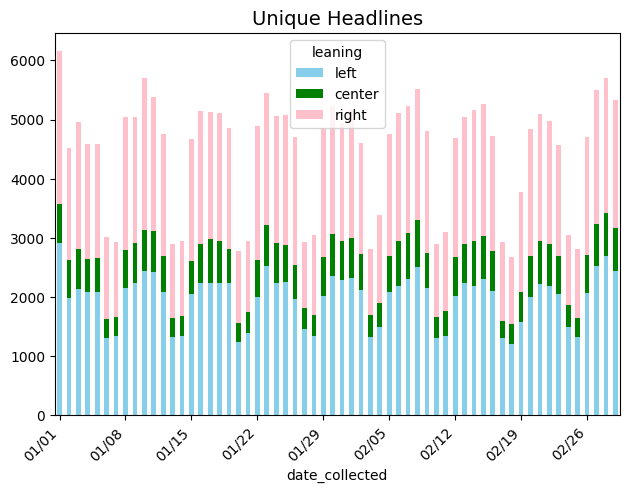

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
               '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05',
               '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
               '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13',
               '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17',
               '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25',
      

In [10]:
get_daily_trend(df_word_space, "Unique Headlines")

In [11]:
def filter_df_by_NE(df, NE):
    filtered_df = df[df['NE'].apply(lambda x: len(set(x) & set(NE)) > 0)]
    return filtered_df

df_biden = filter_df_by_NE(df_word_space, ["Biden", "Joe Biden"])

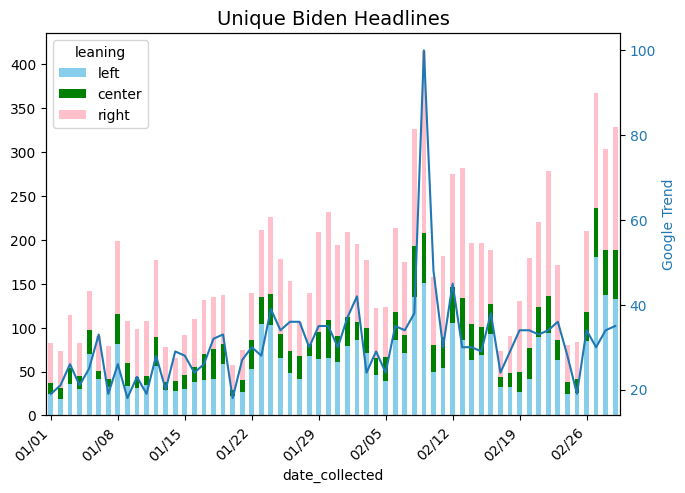

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
               '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05',
               '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
               '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13',
               '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17',
               '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25',
      

In [12]:
get_daily_trend(df_biden, "Unique Biden Headlines", Biden_trend)

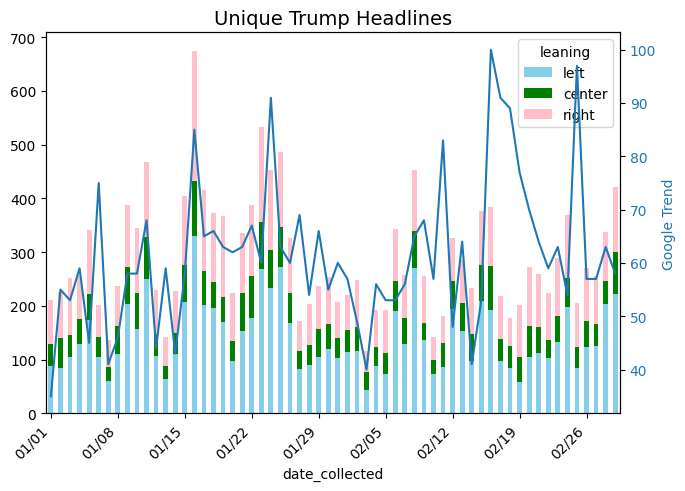

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
               '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05',
               '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
               '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13',
               '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17',
               '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25',
      

In [13]:
df_trump = filter_df_by_NE(df_word_space, ["Trump", "Donald Trump"])
get_daily_trend(df_trump, "Unique Trump Headlines", Trump_trend)

In [14]:
file_path = './data/dem_rep_NEs.json'

with open(file_path, 'r') as file:
    dem_or_rep = json.load(file)

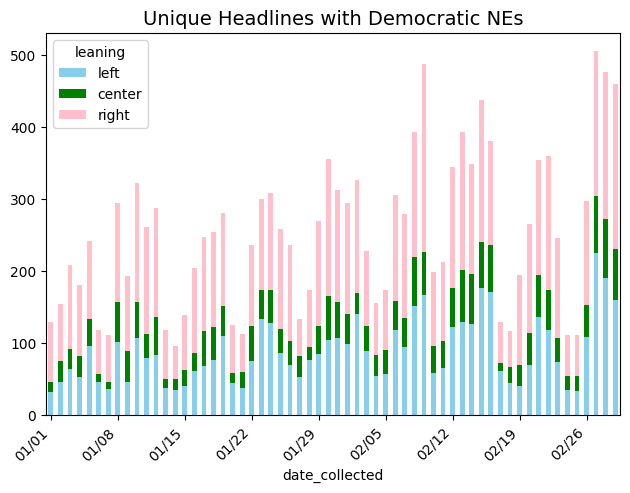

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
               '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05',
               '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
               '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13',
               '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17',
               '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25',
      

In [15]:
df_dem = filter_df_by_NE(df_word_space,dem_or_rep["Dem"])
get_daily_trend(df_dem, "Unique Headlines with Democratic NEs")

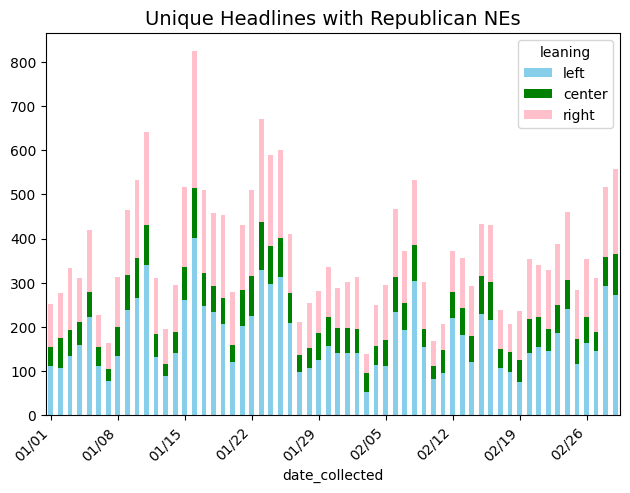

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
               '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05',
               '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
               '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13',
               '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17',
               '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25',
      

In [16]:
df_rep = filter_df_by_NE(df_word_space,dem_or_rep["Rep"])
get_daily_trend(df_rep, "Unique Headlines with Republican NEs")

In [17]:
# corrlationship between differnt side, how one side explain the other side
# descriptive stats of news coverage of both sides

# Word Space Visualization (separate graphs)

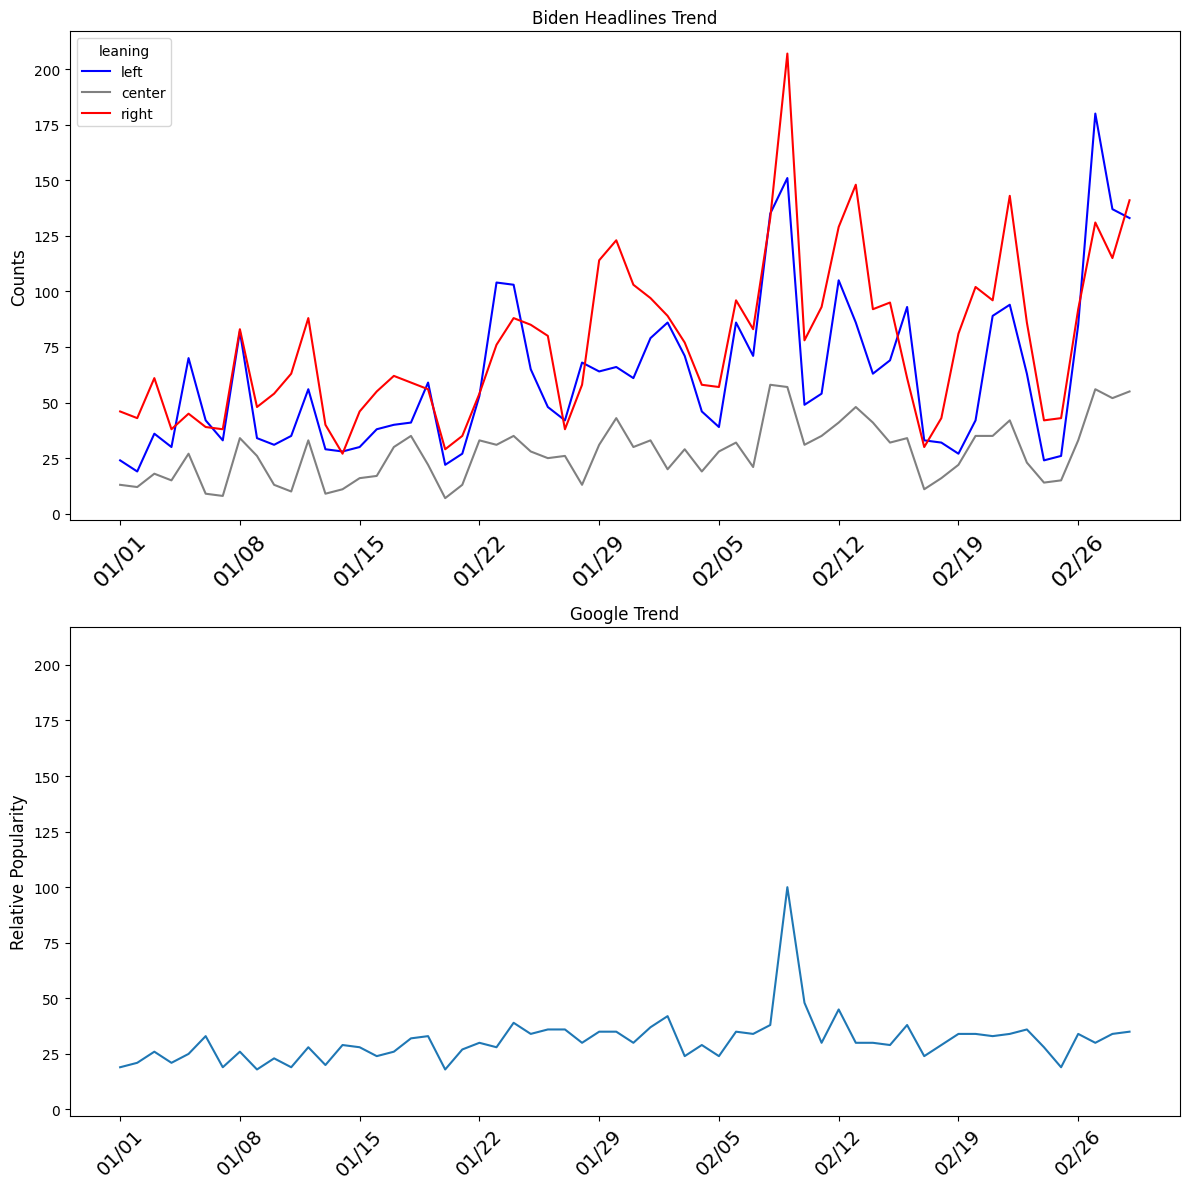

In [97]:
def get_daily_trend_lineplot(df, tilte, trend = None, leaning = ["left", "center", "right"]):
    # hue color 
    hue_colors = {
        'left': 'blue',
        'center': 'gray',
        'right': 'red'}
    
    df_date_stats = df.groupby('date_collected')['leaning'].value_counts().unstack()
    df_date_stats_long = pd.melt(df_date_stats.reset_index(), id_vars=['date_collected'], var_name='leaning', value_name='Value')

    # graph the headline counts
    fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharey=True)
    sns.lineplot(data = df_date_stats_long, x='date_collected', y='Value', hue="leaning", hue_order=leaning, palette = hue_colors, ax = axes[0])

    x_labels = [x for x in df_date_stats.index[::7]] 
    axes[0].set_title(tilte)
    axes[0].set_xlabel("")
    axes[0].set_ylabel("Counts", fontdict = {'fontsize': 12})

    axes[0].set_xticks(ticks=x_labels, labels=[x.strftime('%m/%d') for x in x_labels], rotation=45, fontdict = {'fontsize': 16})

    # add trend 
    sns.lineplot(x = [x[0] for x in trend], y= [int(x[1]) for x in trend], ax = axes[1])
    x_labels_trend = [datetime.strptime(x[0], "%Y-%m-%d") for x in trend][::7]
    axes[1].set_title('Google Trend')
    axes[1].set_xlabel("")
    axes[1].set_ylabel("Relative Popularity", fontdict = {'fontsize': 12})
    axes[1].set_xticks([x for x in range(0, 59, 7)],x_labels_trend, rotation=45)
    axes[1].set_xticklabels([x.strftime("%m/%d") for x in x_labels], rotation=45, fontdict = {'fontsize': 14})

    axes[1].tick_params(axis='y')

    # y tick size
    for ax in axes:
        ax.tick_params(axis='y', labelsize=10)

    plt.tight_layout()
    plt.show()

# biden unique headlines
get_daily_trend_lineplot(df_biden, tilte = "Biden Headlines Trend", trend = Biden_trend)

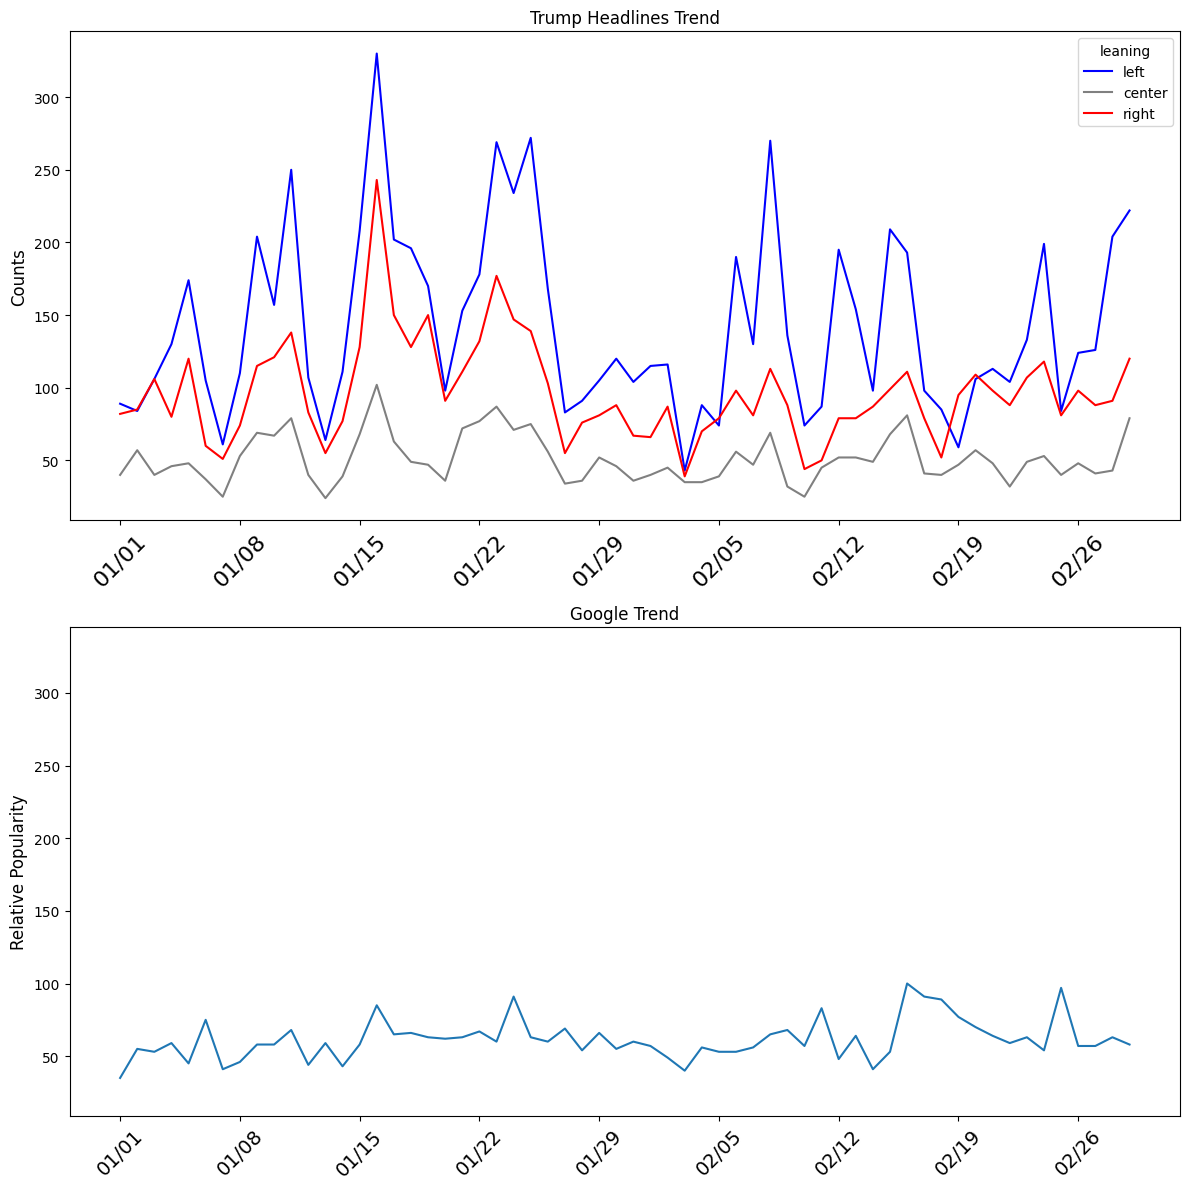

In [98]:
get_daily_trend_lineplot(df_trump, tilte = "Trump Headlines Trend", trend = Trump_trend)

In [78]:
df_trump["leaning"].value_counts() / 60

leaning
left      142.700000
right      96.783333
center     50.983333
Name: count, dtype: float64

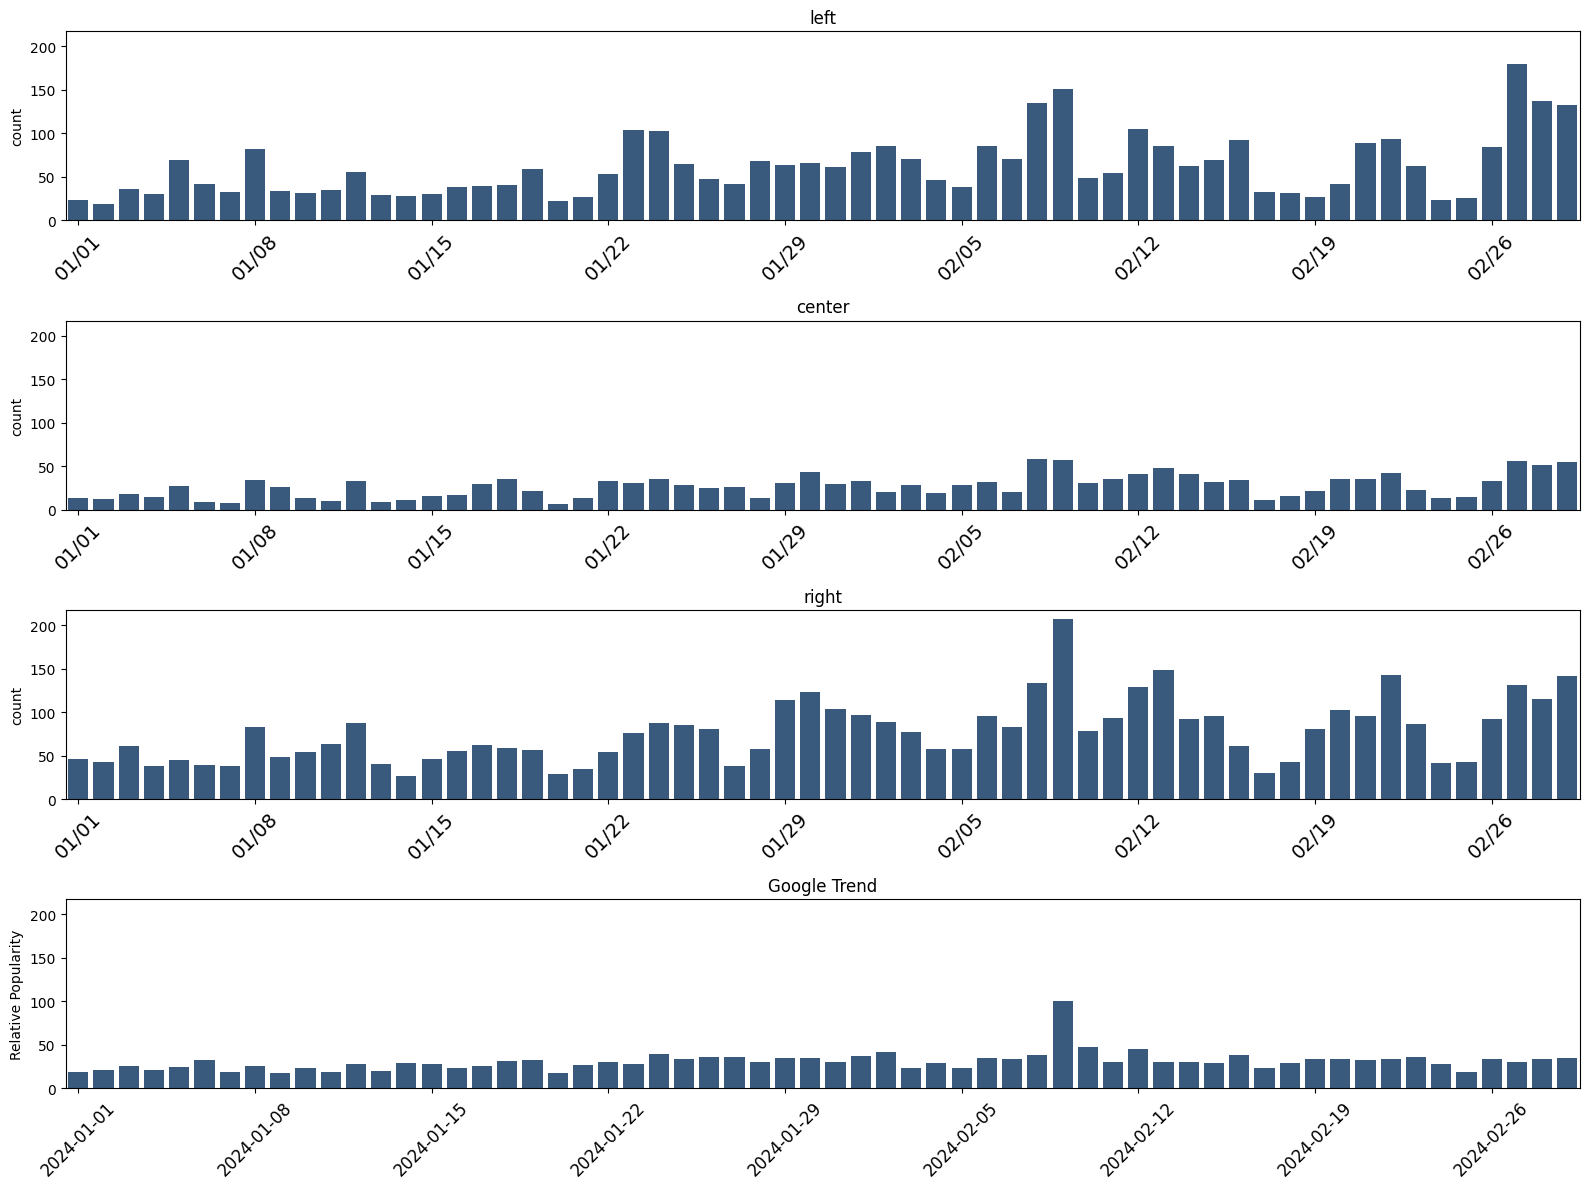

In [18]:
# Format the x-axis to display dates in 'YYYY-MM-DD' format, get x label
def get_daily_trend_sep(df, trend = None, color = "Blue", leaning = ["left", "center", "right"]):
    df_date_stats = df.groupby('date_collected')['leaning'].value_counts().unstack()
    
    # calculate the graph height
    fig_num = len(leaning)
    if trend:
        fig_num += 1

    figsize = fig_num * 4
    fig, axes = plt.subplots(fig_num, 1, figsize=(figsize, 12), sharey=True)
    for l, ax in zip(leaning, axes):
        sns.barplot(df_date_stats, x = "date_collected", y = l, ax=ax, color = color)
        x_labels = [x.strftime('%m/%d') for x in df_date_stats.index[::7]] 
        ax.set_title(l)
        ax.set_xlabel("")
        ax.set_ylabel("count")

        ax.set_xticks([x for x in range(0, 59, 7)])
        ax.set_xticklabels(x_labels, rotation=45, fontdict = {'fontsize': 14})

    if trend:
        ax = axes[-1]
        sns.barplot(x = [x[0] for x in trend], y= [int(x[1]) for x in trend], ax = ax, color = color)
        x_labels = [x[0] for x in trend][::7]
    
        ax.set_title('Google Trend')
        ax.set_xlabel("")
        ax.set_ylabel("Relative Popularity")
        
        ax.set_xticks([x for x in range(0, 59, 7)],x_labels, rotation=45)
        ax.set_xticklabels(x_labels, rotation=45, fontdict = {'fontsize': 12})

        ax.tick_params(axis='y')

    # y tick size
    for ax in axes:
        ax.tick_params(axis='y', labelsize=10)

    # add trend 
    plt.tight_layout()
    plt.show()

# biden unique headlines
get_daily_trend_sep(df_biden, trend = Biden_trend, color = "#2e5a88")

In [79]:
len(df_trump[df_trump["leaning"] == "right"]["siteName"].unique())

12

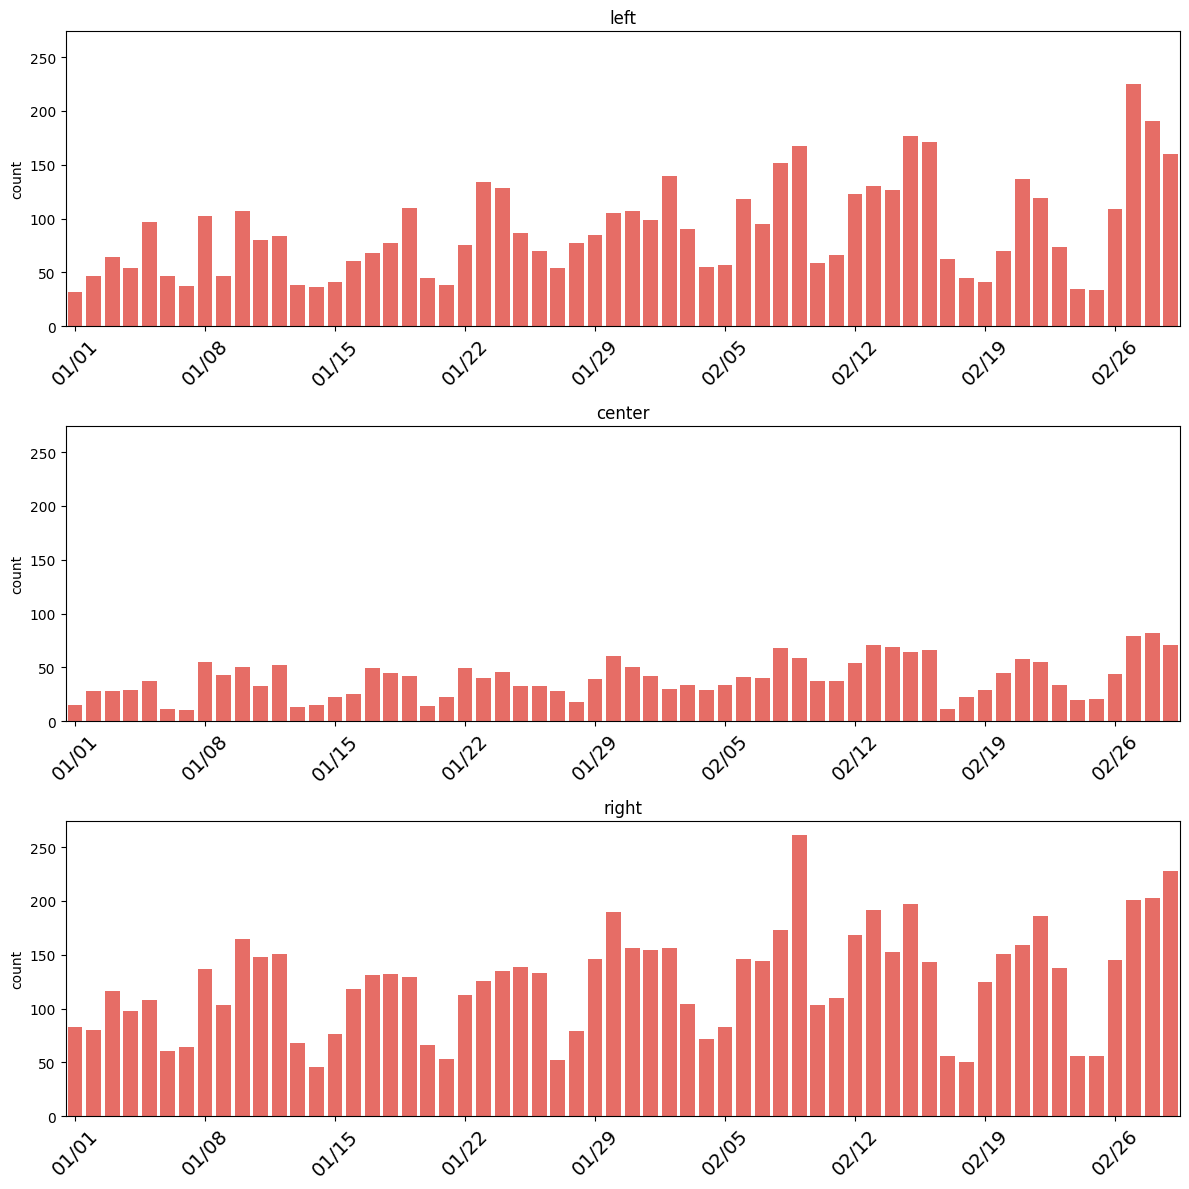

In [52]:
get_daily_trend_sep(df_dem, color = "#fc5a50")

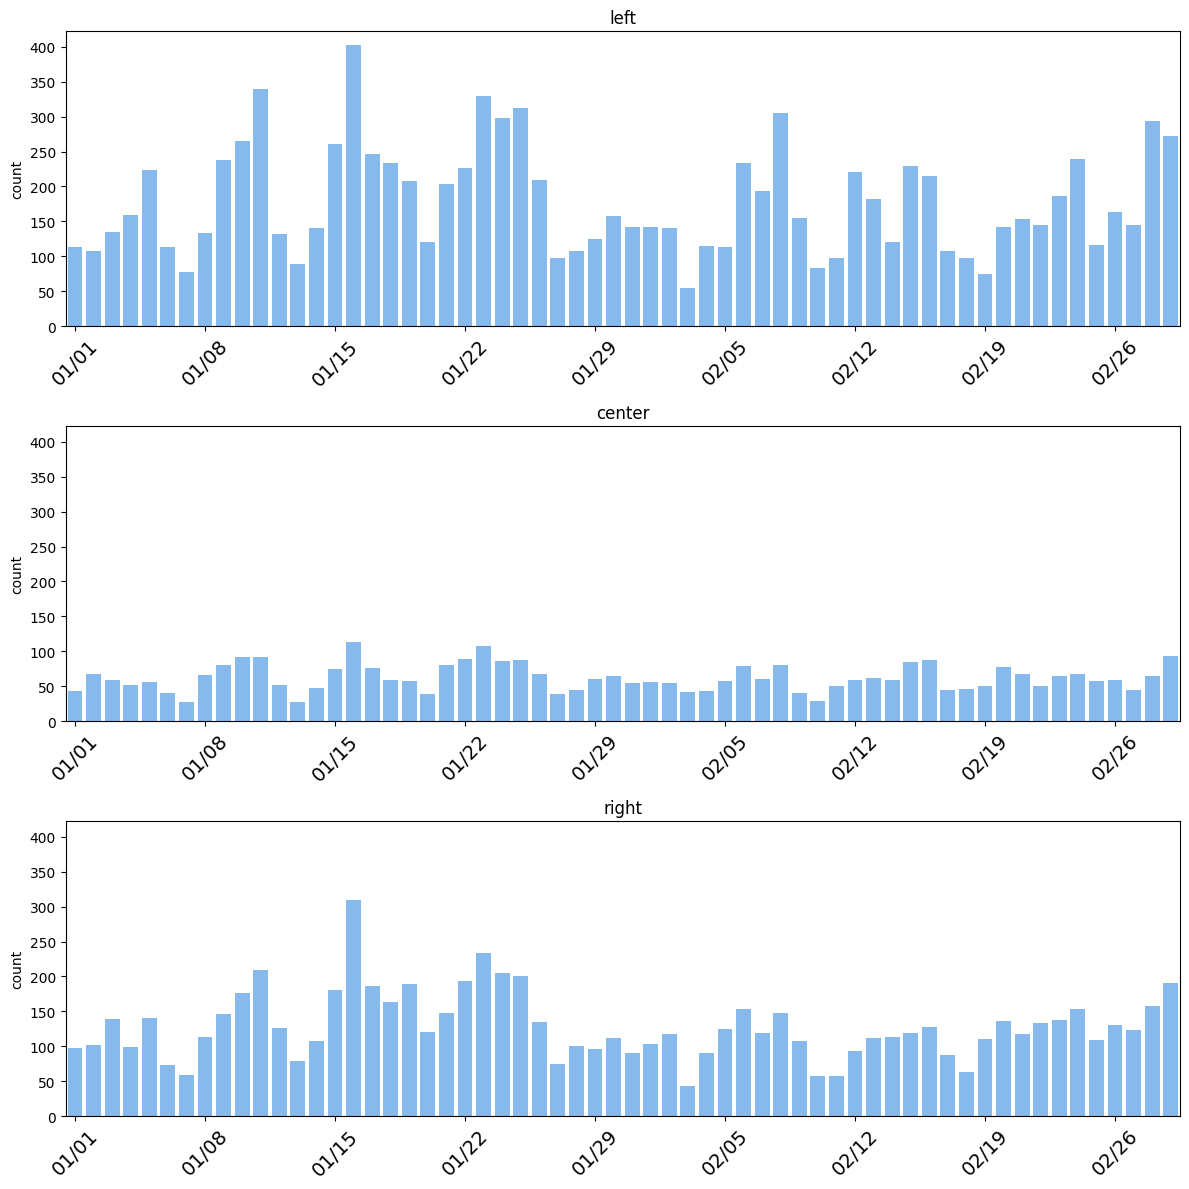

In [53]:
get_daily_trend_sep(df_rep, color = "#75bbfd")

## Spike Analysis

In [95]:
# biden spike
df_biden_spike = df_biden[df_biden["date_collected"].isin(["2024-02-09", "2024-02-08"])]
df_biden_spike["date_collected"].value_counts()

/tmp/ipykernel_28164/1197969686.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_biden_spike = df_biden[df_biden["date_collected"].isin(["2024-02-09", "2024-02-08"])]


date_collected
2024-02-09    415
2024-02-08    326
Name: count, dtype: int64

In [96]:
# trump spike
df_trump_spike = df_trump[df_trump["date_collected"].isin(["2024-01-16"])]
df_trump_spike["date_collected"].value_counts()

/tmp/ipykernel_28164/368831041.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_trump_spike = df_trump[df_trump["date_collected"].isin(["2024-01-16"])]


date_collected
2024-01-16    675
Name: count, dtype: int64

In [111]:
# calculate daily average
left_Biden_daily_average = len(df_biden[df_biden["leaning"] == "left"]) / 60
right_Biden_daily_average = len(df_biden[df_biden["leaning"] == "right"]) / 60
left_Trump_daily_average = len(df_trump[df_trump["leaning"] == "left"]) / 60
right_Trump_daily_average = len(df_trump[df_trump["leaning"] == "right"]) / 60

In [118]:
# biden analysis
left_spike_ratio = (len(df_biden_spike[df_biden_spike["leaning"] == "left"]) / 2) / left_Biden_daily_average
right_spike_ratio = (len(df_biden_spike[df_biden_spike["leaning"] == "right"]) / 2) / right_Biden_daily_average

print(left_spike_ratio)
print(right_spike_ratio)

2.301502145922747
2.211621856027754


In [120]:
# trump analysis
left_spike_ratio = (len(df_trump_spike[df_trump_spike["leaning"] == "left"])) / left_Trump_daily_average
right_spike_ratio = (len(df_trump_spike[df_trump_spike["leaning"] == "right"])) / right_Trump_daily_average

print(left_spike_ratio)
print(right_spike_ratio)

2.312543798177996
2.510762872395385
